<a href="https://colab.research.google.com/github/not-rudy/Applied-Computational-Methods/blob/main/ModuleGa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rudy Medrano**

**Module G2**

**Section 21.4: Simpson's Rule**

**Simpson's Rule:** Approximates the area under f(x) over the two subintervales [xi-1, xi] and [xi, xi+1]. It does so by fitting a quadratic polynomial through the points (xi-1, f(xi-1)), (xi, f(xi)), and (xi+1, f(xi+1)). This is a unique polynomial, which is followed by an exact integration of the quadratic.

There must be an even number of intervals, and the approximation becomes 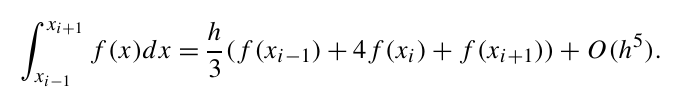

In [3]:
## An example using Simpon's Rule

import numpy as np

a = 0
b = np.pi
n = 11
h = (b-a) / (n-1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simpson = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
Err_simpson = 2 - I_simpson
print(I_simpson)
print(Err_simpson)

2.0001095173150043
-0.00010951731500430384


**Section 21.5: Computing Integrals in Python**

**scipy.integrate:** This subpackage has several functions for computing integrals. The **trapz** function takes as input arguments an array for function values f computed on a numerical grid x.

In [29]:
## An example using the trapz function

!pip install scipy --upgrade
import numpy as np
from scipy.integrate import trapezoid as trapz
a = 0
b = np.pi
n = 11
h = (b-a) / (n-1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f, x)
I_trap = (h/2) * (f[0] + 2*sum(f[:n-2]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.8864429855731812


**cumtrapz function:** This is used when the approximated cumulative integral is needed.

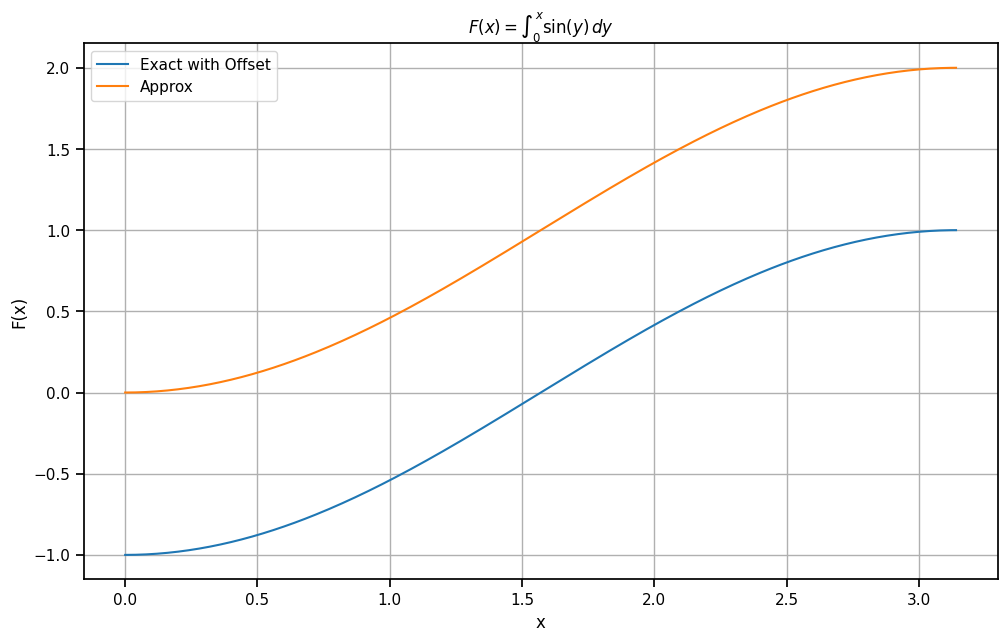

In [30]:
## An example using the cumtrapz function

import numpy as np
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumulative_trapezoid(np.sin(x), x, initial=0)

plt.figure(figsize=(10,6))
plt.plot(x, F_exact, label='Exact with Offset')
plt.plot(x, F_approx, label='Approx')
plt.grid()
plt.tight_layout()
plt.title(r'$F(x) = \int_0^{x} \sin(y) \, dy$')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.show()


**quad(f,a,b) function:** Uses a different numerical differentiation scheme to approximate integrals; **quad** integrates the function defined by the function object, f, from a to b.

In [36]:
## An example using the integrate.quad function

import numpy as np
from scipy.integrate import quad

I_quad = quad(np.sin, 0, np.pi)
print("Integral value and error estimate:", I_quad)

err = 2 - I_quad[0]
print("Integral value:", I_quad[0], "Error:", err)


Integral value and error estimate: (2.0, 2.220446049250313e-14)
Integral value: 2.0 Error: 0.0
